<a href="https://colab.research.google.com/github/Chaki0981/KNN_Tumor_Classification/blob/master/KNN_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import dependencies and config

In [9]:
import numpy as nm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Load data and preprocess

In [2]:
df = pd.read_csv('/content/drive/Othercomputers/Mój komputer/KNN_Tumor_Classification/KNNAlgorithmDataset.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [41]:
len(df.columns)

32

In [5]:
df.drop(['Unnamed: 32'], axis=1, inplace=True)

## 3. Visualize data

In [6]:
diag_count = df['diagnosis'].value_counts()

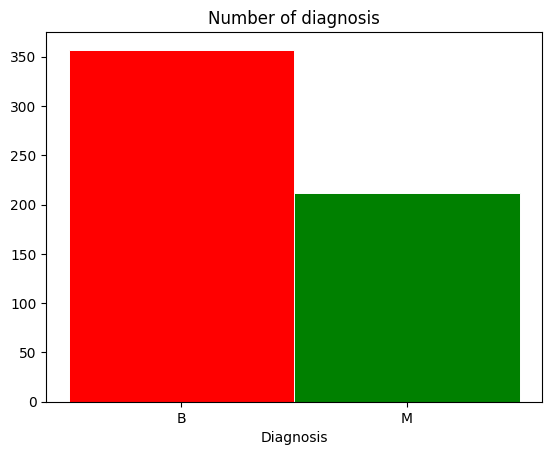

In [60]:
# malignant = M  kotu huylu tumor
# benign = B     iyi huylu tumor

fig, ax = plt.subplots()

ax.bar(diag_count.index, diag_count.values, width=1, edgecolor="white", linewidth=0.7, color=['red', 'green'])
ax.set_title("Number of diagnosis")
ax.set_xlabel("Diagnosis")

plt.show()

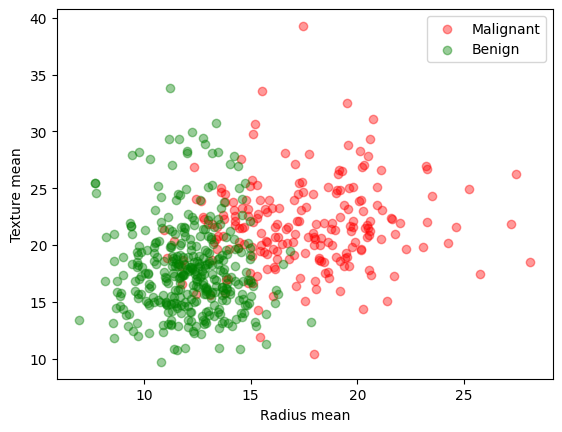

In [65]:
# malignant = M
# benign = B

M = df[df.diagnosis == "M"]
B = df[df.diagnosis == "B"]

plt.scatter(M.radius_mean,M.texture_mean,color="red",label="Malignant",alpha= 0.4)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="Benign",alpha= 0.4)
plt.xlabel("Radius mean")
plt.ylabel("Texture mean")
plt.legend()
plt.show()

## 4. Build KNN model

In [49]:
neigh = KNeighborsClassifier(n_neighbors=5)

In [50]:
train_x = np.array(df.iloc[:400, 2:32])
train_y = np.array(df.iloc[:400, 1])

In [51]:
neigh.fit(train_x, train_y)

KNeighborsClassifier()

In [57]:
pred_x = np.array(df.iloc[402, 2:32])
pred_x = np.expand_dims(pred_x, 0)

In [67]:
prediction = neigh.predict(pred_x)
rel_val = df.iloc[402, 1]

In [68]:
print(f'Predicion: {prediction}; Real value: {rel_val}')

Predicion: ['B']; Real value: B
